In [1]:
# Basic Imports
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:

file_path = r'D:\ml-algorithms\datasets\autos_dataset.csv'

In [3]:
df = pd.read_csv(file_path)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
# Feature Names preasent in the dataset
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### Basic Info

In [5]:
print("Shape of the data set (rows, columns)",df.shape)
print("\nColumn Types: \n", df.dtypes)

Shape of the data set (rows, columns) (205, 26)

Column Types: 
 symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [6]:
print("Missing Values: \n",df.isnull().sum())

Missing Values: 
 symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


### Check how many '?' values exist in each column

In [7]:
(df == '?').sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
df[df.isin(['?']).any(axis=1)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


### Convert '?' to NaN

In [9]:
df.replace('?',np.nan,inplace=True)

In [10]:
# Now Check the NaN/ missing values that are preasent in the dataseet
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Missing Values

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

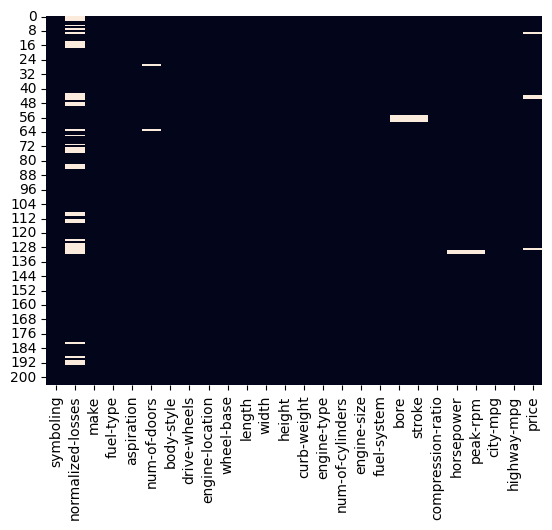

In [11]:
# are preasent in the dataset
sns.heatmap(df.isnull(),cbar=False)
df.isnull().sum()

### Dataset Overview

In [12]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Check object-type columns for unique non-numeric values

In [14]:
# Check unique values in object columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in `{col}`: ")
    print(df[col].unique())


Unique values in `normalized-losses`: 
[nan '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

Unique values in `make`: 
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Unique values in `fuel-type`: 
['gas' 'diesel']

Unique values in `aspiration`: 
['std' 'turbo']

Unique values in `num-of-doors`: 
['two' 'four' nan]

Unique values in `body-style`: 
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Unique values in `drive-wheels`: 
['rwd' 'fwd' '4wd']

Unique values in `engine-location`: 
['front' 'rear']

Unique values in `engine-type`: 
['dohc' 'ohcv' 'ohc' 'l' 'roto

---

### Convert columns with numeric strings (and NaNs) to actual numeric type

#### 🔧 1. Identify columns to convert

Based on the data, the following columns **should be numeric but are `object`**:

* `normalized-losses`
* `bore`
* `stroke`
* `price`
* `horsepower `


In [15]:
cols_to_convert = ['normalized-losses','bore','stroke','price','horsepower','peak-rpm']

In [16]:
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col],errors='coerce') #  will turn '?' or any junk into NaN

In [17]:
## Check if junk still exist
for col in cols_to_convert:
    non_numeric = df[col].isna().sum()
    print(f"{col}: {non_numeric} missing values (after conversion)")

normalized-losses: 41 missing values (after conversion)
bore: 4 missing values (after conversion)
stroke: 4 missing values (after conversion)
price: 4 missing values (after conversion)
horsepower: 2 missing values (after conversion)
peak-rpm: 2 missing values (after conversion)


In [18]:
# Strip whitespaces from all object-type columns

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### To fill the missing value we will take help of stastics

In [20]:
# check missing value count and percentage
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing_Values': missing_count,
    'Percentage':missing_percent
})
print(missing_info[missing_info['Missing_Values']>0])

                   Missing_Values  Percentage
normalized-losses              41    20.00000
num-of-doors                    2     0.97561
bore                            4     1.95122
stroke                          4     1.95122
horsepower                      2     0.97561
peak-rpm                        2     0.97561
price                           4     1.95122


### Check if data is skewed or Normally Distributed

- If |skewness| < 0.5 → approximately normal → use mean
- If 0.5 < |skewness| < 1 → moderately skewed → median is safer
- If |skewness| > 1 → highly skewed → definitely use median

#### Price

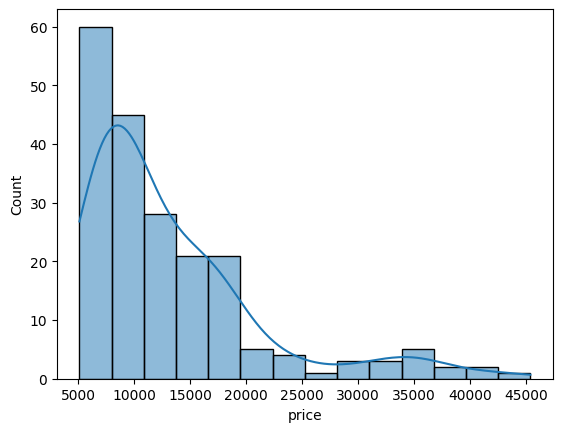

In [21]:
### Price
sns.histplot(df['price'],kde=True)
plt.show()

In [22]:
print('Skewness of price: ',df['price'].skew())

Skewness of price:  1.8096753390980749


#### Horsepower

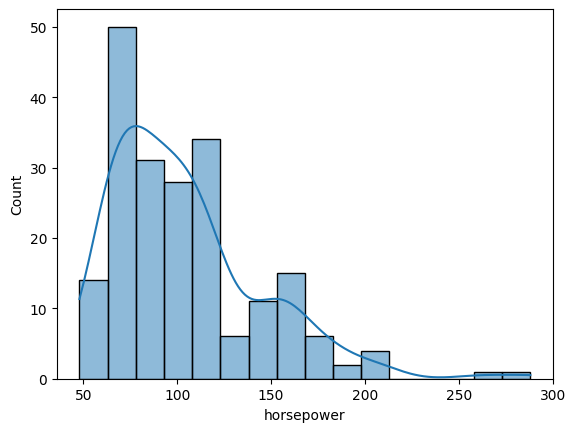

In [23]:
sns.histplot(df['horsepower'],kde=True)
plt.show()

In [24]:
print("Skewness of Horsepower: ",df['horsepower'].skew())

Skewness of Horsepower:  1.3910294937929355


#### normalized-losses

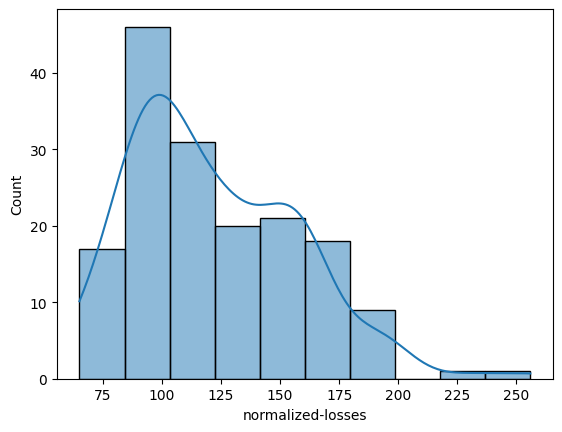

In [25]:
sns.histplot(df['normalized-losses'],kde=True)
plt.show()

In [26]:
print("Skewness of normalized-losses : ",df['normalized-losses'].skew())

Skewness of normalized-losses :  0.7659764175950632


#### Bore

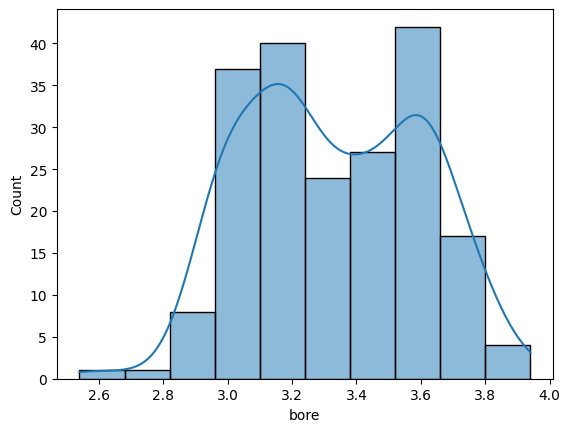

In [27]:
sns.histplot(df['bore'],kde=True)
plt.show()

In [28]:
print("Skewness of bore: ",df['bore'].skew())

Skewness of bore:  0.020015510309870796


#### stroke

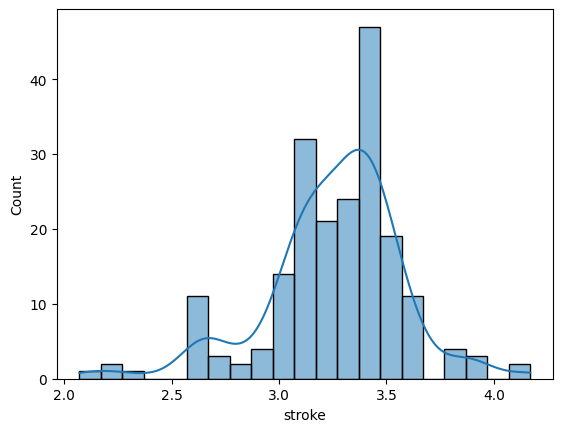

In [29]:
sns.histplot(df['stroke'],kde=True)
plt.show()

In [30]:
print("skewness of stroke: ",df['stroke'].skew())

skewness of stroke:  -0.6831221940577341


----

### Check for outliers

In [31]:
# By IQR

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Detect Outliers
outliers_indices = {}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Store the indices of outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outliers_indices[col] = list(outliers)

for col, indices in outliers_indices.items():
    print(f"{col}: {len(indices)} outliers")

symboling: 0 outliers
normalized-losses: 1 outliers
wheel-base: 3 outliers
length: 1 outliers
width: 8 outliers
height: 0 outliers
curb-weight: 0 outliers
engine-size: 10 outliers
bore: 0 outliers
stroke: 20 outliers
compression-ratio: 28 outliers
horsepower: 6 outliers
peak-rpm: 2 outliers
city-mpg: 2 outliers
highway-mpg: 3 outliers
price: 14 outliers


### Visulize the outliers

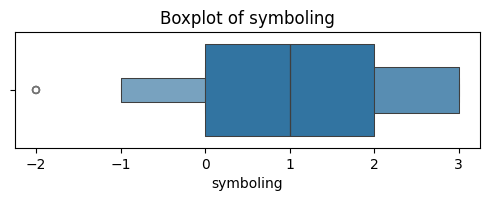

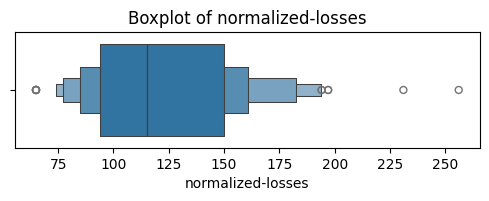

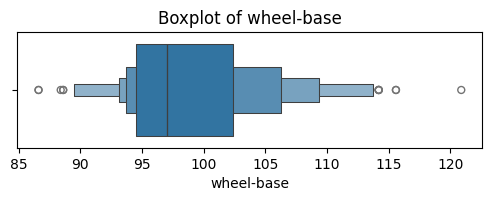

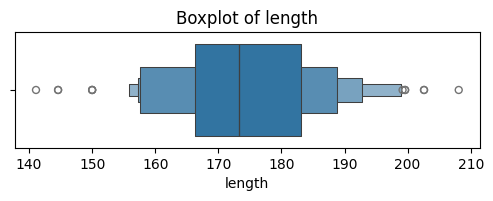

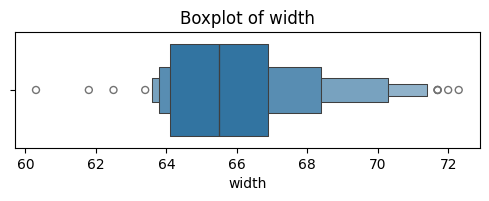

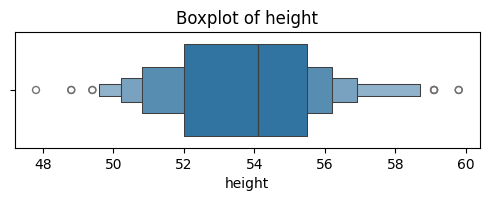

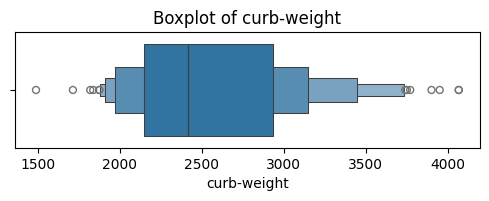

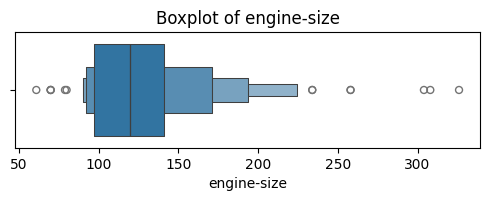

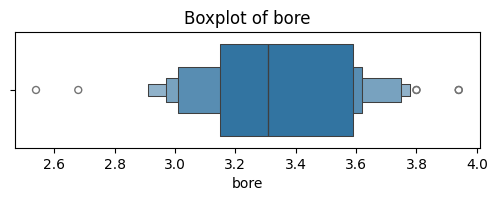

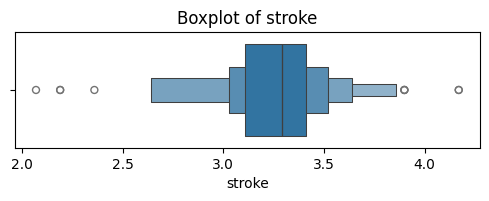

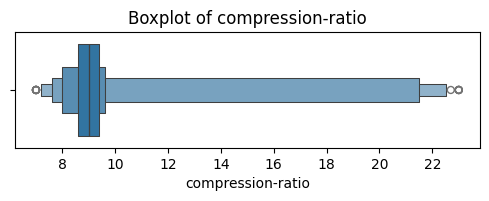

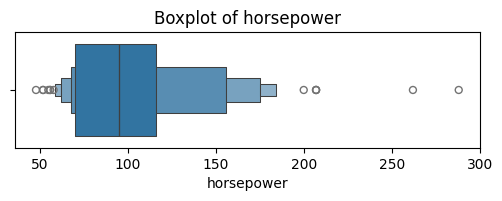

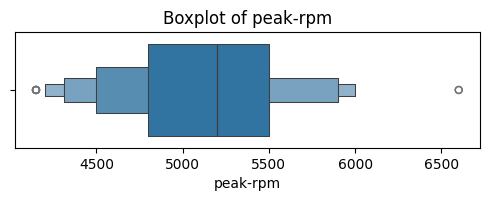

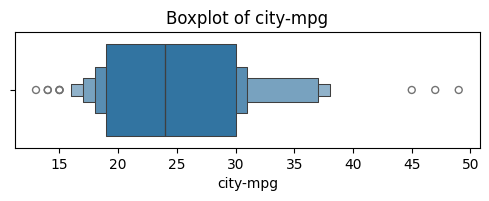

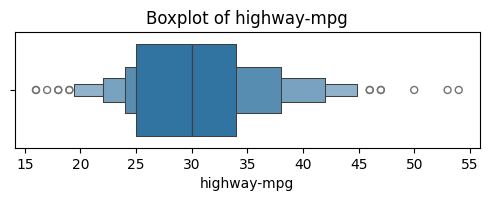

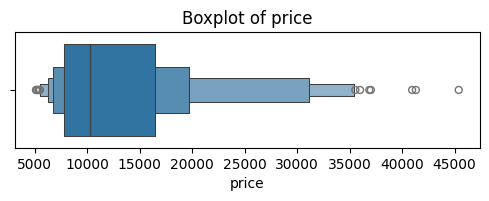

In [32]:
for col in numeric_columns:
    plt.figure(figsize=(6,1.5))
    sns.boxenplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## 1.Fill the missing values

In [33]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [34]:
# Drop rows with missing target as this is our target column we can do that
df.dropna(subset=['price'], inplace=True)

In [35]:
missing_info = df.isnull().sum().sort_values(ascending=False)
missing_info = missing_info[missing_info > 0]
print(missing_info)

normalized-losses    37
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          2
dtype: int64


| Column         | Type        | % Missing | Strategy                            |
| -------------- | ----------- | --------- | ----------------------------------- |
| `stroke`       | Numeric     | 10%       | Mean or Median                      |
| `horsepower`   | Numeric     | 2%        | Median (robust to outliers)         |
| `num-of-doors` | Categorical | 1%        | Mode                                |
| `price`        | Target      | 15%       | **Drop rows** (don't impute target) |


In [36]:
# # Fill the missing values
# num_cols_with_na = ['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm']

# for col in num_cols_with_na:
#     df[col] = df[col].astype(float)
#     df[col].fillna(df[col].median(),inplace=True)

# This methdo will replace in future
# use new method isted

# C:\Users\akash\AppData\Local\Temp\ipykernel_14364\3487815005.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
# The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

# For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


#   df[col].fillna(df[col].median(),inplace=True)
# C:\Users\akash\AppData\Local\Temp\ipykernel_14364\3487815005.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
# The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

# For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


#   df[col].fillna(df[col].median(),inplace=True)
# C:\Users\akash\AppData\Local\Temp\ipykernel_14364\3487815005.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
# The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

# For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


#   df[col].fillna(df[col].median(),inplace=True)
# C:\Users\akash\AppData\Local\Temp\ipykernel_14364\3487815005.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
# The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

# For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.
# ...
# For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.

#   df[col].fillna(df[col].median(),inplace=True)
# Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

In [37]:
df.fillna({
    'normalized-losses': df['normalized-losses'].median(),
    'stroke': df['stroke'].median(),
    'bore': df['bore'].median(),
    'horsepower': df['horsepower'].median(),
    'peak-rpm': df['peak-rpm'].median()
}, inplace=True)

In [38]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [39]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


We choose **median** over **mean or mode** in the following situations — and in your dataset, this applies well. Here's why:

---

### 🔍 Why Use **Median**?

1. **Robust to Outliers**:

   * If a column is **numerical** and **skewed** (which your data like `price`, `horsepower`, etc. are), **mean** can be heavily affected by extreme values (outliers).
   * **Median**, on the other hand, is resistant to outliers — it represents the "middle" better when data isn’t symmetric.

   **Example**:
   If you have values: `[1000, 1050, 1100, 1150, 1,000,000]`

   * Mean = very high
   * Median = unaffected

2. **Your Data is Skewed**:

   * You mentioned skewness like `price = 1.8` and `horsepower = 1.3`, etc. This confirms that your data is **right-skewed**, so **median is the safer choice**.

---

### 🧠 When to Use What?

| Imputation Method | Use When...                                                   |
| ----------------- | ------------------------------------------------------------- |
| **Mean**          | Data is **normally distributed** (symmetric, no/few outliers) |
| **Median**        | Data is **skewed** or has **outliers**                        |
| **Mode**          | Data is **categorical** or **discrete with repetitions**      |

---

### ⚙️ For your case:

* `normalized-losses`, `stroke`, `bore`, `horsepower`, `price`, `peak-rpm` → **Median**
* `num-of-doors` → **Mode** (because it's categorical)

---

### For categorical

In [40]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

C:\Users\akash\AppData\Local\Temp\ipykernel_8096\4239780594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)


In [42]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
# Convert words to numbers
# As this is regression proble statement we can benifit form it

In [43]:
word_to_number = {
    'two':2,
    'four':4
}
df['num-of-doors'] = df['num-of-doors'].map(word_to_number)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    int64  
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

#### No_of_cylinders categorical feature

In [46]:
df['num-of-cylinders'].value_counts()

num-of-cylinders
four      157
six        24
five       10
eight       4
two         4
twelve      1
three       1
Name: count, dtype: int64

#### 🔹 `df['num-of-cylinders'].map()`

**Use when:**

* The **categories represent actual numeric values** with **ordinal or quantitative meaning**.
* You want the model to **understand numerical relationships** (e.g., 8 cylinders > 4 cylinders).
* You're going to use models that **benefit from numeric continuity**, like **Linear Regression, Decision Trees, XGBoost**, etc.

✅ **Best for:**
`'num-of-cylinders'` → because “eight” cylinders literally means 8, and more cylinders usually mean more power.

---

#### 🔹 `pd.get_dummies(df, columns=['col'])`

**Use when:**

* The feature is **categorical** but **not ordinal** (no natural order).
* The text labels are **just categories**, not meaningful numbers.
* You don’t want to imply any **ranking or distance** between the categories.
* You’re using models that handle one-hot encoded features well, such as **Logistic Regression, KNN, SVM**, etc.

✅ **Best for:**
`'body-style'`, `'fuel-type'`, `'drive-wheels'`, etc.

---

#### ❗What happens if you use `get_dummies()` on `num-of-cylinders`?

* You lose the **numerical meaning** of cylinder count.
* Instead of understanding "8 > 4 > 2", the model sees just separate binary flags like:

  * `cylinder_two`
  * `cylinder_four`
  * `cylinder_six`
* For many regression models, this **reduces the model's ability to learn trends** across numerical ranges.

---

#### ✅ Conclusion

| Feature Type                             | Best Approach       |
| ---------------------------------------- | ------------------- |
| Numeric meaning (e.g., cylinders, doors) | `.map()` to numeric |
| Pure categories (e.g., fuel type, brand) | `pd.get_dummies()`  |

Let me know if you want help listing all columns in your dataset by type so you can choose the right encoding for each.


In [47]:
cylinder_map = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

df['number-of-cylinders'] = df['num-of-cylinders'].map(cylinder_map)

#### Fuel_Type

In [48]:
df['fuel-type'].value_counts()

fuel-type
gas       181
diesel     20
Name: count, dtype: int64

In [49]:
### One-hot encoding the  `fuel-type` column
df = pd.get_dummies(df,columns=['fuel-type'],drop_first=True)

### Stastical Distribution Mean, Median, Mode,... etc

In [ ]:
# Stastical analysis of the dataset Mean, Median, Mode,....etc
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17


In [ ]:
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

- How many distinct (non-duplicate) values are present in each column.
    - Helps you quickly identify:
         * Categorical columns (with low unique values)
         * Columns that may be IDs (with all values unique)

### Univariate Analysis